# Exercise 3.1 (Gravity Field)

In [1]:
using NBInclude
using Dates
using LinearAlgebra,Plots

@nbinclude("./SAT_Force.ipynb")

Density_HP (generic function with 1 method)

- Montebruck- Force Model 53.pag
- Montebruck- 113.pag


The processor time required to compute the satellite acceleration due to the Earth’s gravity field is to be determined as a function of the model’s order using the Cunningham algorithm and a maximum order of 20. Compare the observed times with the assumption of a quadratic increase of the workload with the order of the gravity field.

## Earth gravity model (JGM3)

In [2]:
N_JGM3 = 20
GM_Earth = 398600.4415e+9 
R_JGM3 = 6378.1363e3   # // Radius Earth [m]; 
CS_JGM3=zeros(N_JGM3+1,N_JGM3+1)
CS_JGM3!(CS_JGM3,Float64)

GravJGM3=GravModel{Float64}(N_JGM3,GM_Earth,R_JGM3,CS_JGM3)

GravModel{Float64}(20, 3.986004415e14, 6.3781363e6, [1.0 0.0 … 7.160542e-11 2.759192e-9; 0.0 0.0 … -1.008909e-10 3.216826e-10; … ; -2.197334e-8 -3.156695e-9 … -9.155723e-31 -1.237749e-31; 1.203146e-7 3.688524e-9 … -1.878413e-31 4.054696e-32])

## CPU Times

In [3]:
t0=now()
t1=now()
(typeof(t1-t0),t1-t0)

(Millisecond, Millisecond(1))

In [4]:
N_Step=100000    #10000
n_max=20         # 20

r=[6525.919e3, 1710.416e3, 2508.886e3]   # m
I3=Matrix{Float64}(I, 3, 3)

gravity_fields=2:2:n_max


CPU_times=zeros(Millisecond,length(gravity_fields))

for n in gravity_fields
    
    t0=now()
    
    for i in 0:N_Step
        
        a= AccelHarmonic(r,I3,GravJGM3.GM,GravJGM3.R,GravJGM3.CS,n,n)
    end
    
    t1=now()
    
    i=div(n,2)
    CPU_times[i]=t1-t0
    
end

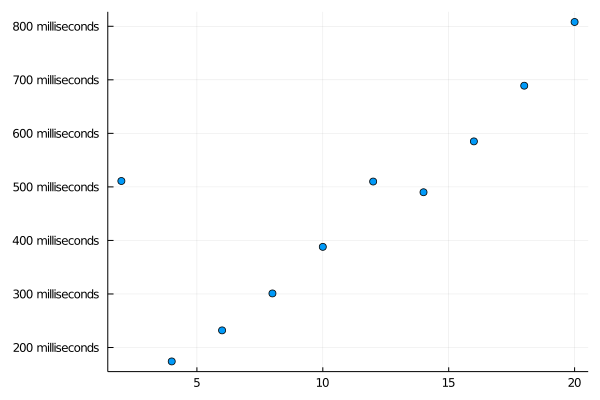

In [5]:
plot(gravity_fields,CPU_times,label="",seriestype = :scatter)